In [1]:
#References : 
"""
1. https://github.com/shahanHasan/Spam-Email-Classification-Adversarial-Attacks/blob/main/SPAM%20Email%20Classification%20.ipynb
2. https://www.kaggle.com/surekharamireddy/spam-detection-with-99-accuracy
3. https://www.kaggle.com/mikelutter/spam-classifier-with-keras
"""


'\n1. https://github.com/shahanHasan/Spam-Email-Classification-Adversarial-Attacks/blob/main/SPAM%20Email%20Classification%20.ipynb\n2. https://www.kaggle.com/surekharamireddy/spam-detection-with-99-accuracy\n3. https://www.kaggle.com/mikelutter/spam-classifier-with-keras\n'

In [2]:
import numpy as np
import pandas as pd
import re
import string
import os
import random
import email

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud 
from wordcloud import WordCloud, ImageColorGenerator

from sklearn.preprocessing import LabelEncoder

# NLP lib
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.tokenize import word_tokenize
from nltk import flatten , PorterStemmer, WordNetLemmatizer, FreqDist
from collections import Counter

from nltk.corpus import stopwords
stopwords = stopwords.words('english')

#Mark Down print
from IPython.display import Markdown, display
def printmd(string):
    # Print with Markdowns    
    display(Markdown(string))
# To save the models
import pickle

[nltk_data] Downloading package punkt to /home/shahan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/shahan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/shahan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
#Enron data
ENRON = pd.read_csv("Datasets/Enron/spam(madeof).csv")
#Ling Spam
LINGSPAM = pd.read_csv("Datasets/lingspam/messages.csv")
#Spam Base
SPAMBASE = pd.read_csv("Datasets/spambase/spambase.data")
#Spam Assasin

In [4]:
with open('Datasets/spambase/spambase.DOCUMENTATION') as f:
    SPAMBASE_DOCUMENTATION = f.readlines()
    
SPAMBASE_DOCUMENTATION

['1. Title:  SPAM E-mail Database\n',
 '\n',
 '2. Sources:\n',
 '   (a) Creators: Mark Hopkins, Erik Reeber, George Forman, Jaap Suermondt\n',
 '        Hewlett-Packard Labs, 1501 Page Mill Rd., Palo Alto, CA 94304\n',
 '   (b) Donor: George Forman (gforman at nospam hpl.hp.com)  650-857-7835\n',
 '   (c) Generated: June-July 1999\n',
 '\n',
 '3. Past Usage:\n',
 '   (a) Hewlett-Packard Internal-only Technical Report. External forthcoming.\n',
 '   (b) Determine whether a given email is spam or not.\n',
 '   (c) ~7% misclassification error.\n',
 '       False positives (marking good mail as spam) are very undesirable.\n',
 '       If we insist on zero false positives in the training/testing set,\n',
 '       20-25% of the spam passed through the filter.\n',
 '\n',
 '4. Relevant Information:\n',
 '        The "spam" concept is diverse: advertisements for products/web\n',
 '        sites, make money fast schemes, chain letters, pornography...\n',
 '\tOur collection of spam e-mails came f

In [5]:
with open('Datasets/spambase/spambase.names') as f:
    SPAMBASE_NAMES = f.readlines()
    
SPAMBASE_NAMES

['| SPAM E-MAIL DATABASE ATTRIBUTES (in .names format)\n',
 '|\n',
 '| 48 continuous real [0,100] attributes of type word_freq_WORD \n',
 '| = percentage of words in the e-mail that match WORD,\n',
 '| i.e. 100 * (number of times the WORD appears in the e-mail) / \n',
 '| total number of words in e-mail.  A "word" in this case is any \n',
 '| string of alphanumeric characters bounded by non-alphanumeric \n',
 '| characters or end-of-string.\n',
 '|\n',
 '| 6 continuous real [0,100] attributes of type char_freq_CHAR\n',
 '| = percentage of characters in the e-mail that match CHAR,\n',
 '| i.e. 100 * (number of CHAR occurences) / total characters in e-mail\n',
 '|\n',
 '| 1 continuous real [1,...] attribute of type capital_run_length_average\n',
 '| = average length of uninterrupted sequences of capital letters\n',
 '|\n',
 '| 1 continuous integer [1,...] attribute of type capital_run_length_longest\n',
 '| = length of longest uninterrupted sequence of capital letters\n',
 '|\n',
 '| 1 c

In [6]:
print(f"duplicated entries {ENRON.duplicated().sum()}")
ENRON = ENRON.drop_duplicates()
print(f"duplicated entries {ENRON.duplicated().sum()}")

duplicated entries 178
duplicated entries 0


In [7]:
#remove Null values
print("Number of null values in the dataset :")
print(f"{ENRON.isnull().sum()}")
print(f"shape of the dataset : {ENRON.shape}, Number of rows and columns : {ENRON.shape[0]} , {ENRON.shape[1]}")

Number of null values in the dataset :
v1    0
v2    0
dtype: int64
shape of the dataset : (4993, 2), Number of rows and columns : 4993 , 2


In [8]:
# Pre-Process ENRON
ENRON.head()

v1                                                 v2
0   ham  Subject: enron methanol ; meter # : 988291\nth...
1   ham  Subject: hpl nom for january 9 , 2001\r\n( see...
2   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...
3  spam  Subject: photoshop , windows , office . cheap ...
4   ham  Subject: re : indian springs\r\nthis deal is t...

In [9]:
ENRON["spam"] = ENRON.v1
ENRON["text"] = ENRON.v2

In [10]:
ENRON.head()

v1                                                 v2  spam  \
0   ham  Subject: enron methanol ; meter # : 988291\nth...   ham   
1   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   ham   
2   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   ham   
3  spam  Subject: photoshop , windows , office . cheap ...  spam   
4   ham  Subject: re : indian springs\r\nthis deal is t...   ham   

                                                text  
0  Subject: enron methanol ; meter # : 988291\nth...  
1  Subject: hpl nom for january 9 , 2001\r\n( see...  
2  Subject: neon retreat\r\nho ho ho , we ' re ar...  
3  Subject: photoshop , windows , office . cheap ...  
4  Subject: re : indian springs\r\nthis deal is t...

In [11]:
ENRON = ENRON.drop(columns=["v1","v2"])

In [12]:
ENRON.head()

spam                                               text
0   ham  Subject: enron methanol ; meter # : 988291\nth...
1   ham  Subject: hpl nom for january 9 , 2001\r\n( see...
2   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...
3  spam  Subject: photoshop , windows , office . cheap ...
4   ham  Subject: re : indian springs\r\nthis deal is t...

In [13]:
ENRON.describe()

spam                                               text
count   4993                                               4993
unique     2                                               4993
top      ham  Subject: we have all your favorite programs at...
freq    3531                                                  1

In [14]:
#Encode Enron Label
le = LabelEncoder()
ENRON.spam = le.fit_transform(ENRON.spam)


In [15]:
for i in range(10):
    print(ENRON.text[i],"\n")

Subject: enron methanol ; meter # : 988291
this is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary
flow data provided by daren } .
please override pop ' s daily volume { presently zero } to reflect daily
activity you can obtain from gas control .
this change is needed asap for economics purposes . 

Subject: hpl nom for january 9 , 2001
( see attached file : hplnol 09 . xls )
- hplnol 09 . xls 

Subject: neon retreat
ho ho ho , we ' re around to that most wonderful time of the year - - - neon leaders retreat time !
i know that this time of year is extremely hectic , and that it ' s tough to think about anything past the holidays , but life does go on past the week of december 25 through january 1 , and that ' s what i ' d like you to think about for a minute .
on the calender that i handed out at the beginning of the fall semester , the retreat was scheduled for the weekend of january 5 - 6 . but because of a youth ministers conference that brad and dustin are c

## Data Cleaning

In [16]:
def replace_hyperlink(word):
    return  re.sub(r'http[s ]?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+', 'Links ', word)

def replace_hyperlink_spaced(word):
    return  re.sub(r'(http|https) \w+[ ]?\.[ ]?\w+', 'Links ', word)

def replace_email(word):
    return re.sub(r"[a-z0-9\.\-+_]+@[a-z0-9\.\-+_]+\.[a-z]+", "MailID ", word)

def replace_email_spaced(word):
    return re.sub(r"[a-z0-9\.\-+_ ]+@[a-z0-9\.\-+_ ]+\.[a-z ]+", "MailID ", word)

def replace_money_sign(word):
    return re.sub(r"(£|\$)", "Money ", word)

def replace_number(word):
    return re.sub(r'\d+\.?[0-9]*', 'numbers ', word)

def clean_up_pipeline(sentence):
    cleaning_utils = [replace_hyperlink,
                      replace_hyperlink_spaced,
                      replace_email,
                      replace_email_spaced,
                      replace_money_sign,  
                      replace_number]
    for o in cleaning_utils:
        sentence = o(sentence)
    return sentence

ENRON["CLEANED"] = [clean_up_pipeline(o) for o in ENRON["text"]]
#x_train[0]

In [17]:
for i in range(50):
    print(ENRON.CLEANED[i],"\n")
    print(ENRON.text[i],"\n\n")
    print("-----------------------")

Subject: enron methanol ; meter # : numbers 
this is a follow up to the note i gave you on monday , numbers  / numbers  / numbers  { preliminary
flow data provided by daren } .
please override pop ' s daily volume { presently zero } to reflect daily
activity you can obtain from gas control .
this change is needed asap for economics purposes . 

Subject: enron methanol ; meter # : 988291
this is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary
flow data provided by daren } .
please override pop ' s daily volume { presently zero } to reflect daily
activity you can obtain from gas control .
this change is needed asap for economics purposes . 


-----------------------
Subject: hpl nom for january numbers  , numbers 
( see attached file : hplnol numbers  . xls )
- hplnol numbers  . xls 

Subject: hpl nom for january 9 , 2001
( see attached file : hplnol 09 . xls )
- hplnol 09 . xls 


-----------------------
Subject: neon retreat
ho ho ho , we ' re around to that mos

In [18]:
ENRON.head()

spam                                               text  \
0     0  Subject: enron methanol ; meter # : 988291\nth...   
1     0  Subject: hpl nom for january 9 , 2001\r\n( see...   
2     0  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3     1  Subject: photoshop , windows , office . cheap ...   
4     0  Subject: re : indian springs\r\nthis deal is t...   

                                             CLEANED  
0  Subject: enron methanol ; meter # : numbers \n...  
1  Subject: hpl nom for january numbers  , number...  
2  Subject: neon retreat\r\nho ho ho , we ' re ar...  
3  Subject: photoshop , windows , office . cheap ...  
4  Subject: re : indian springs\r\nthis deal is t...

## Feature Engineering / Pre Processing

In [19]:
# Pre Processings
def remove_puntuation(text):
    return ("".join([ch for ch in text if ch not in string.punctuation]))

def text_lower_tokenized(text):
    txt = word_tokenize(text)
    txt =[w.lower() for w in txt]
    return txt

def remove_small_words(text):
    return [x for x in text if len(x) > 3 ]

user_defined = ["subject"]

def remove_userdefined_words(text):
    return [w for w in text if w not in user_defined]

def remove_stopwords(text):
    return [w for w in text if w not in stopwords]

def Lemmatize(text):
    word_net = WordNetLemmatizer()
    return [word_net.lemmatize(word) for word in text]

def get_sentence(tokens):
    txt =' '.join([word for word in tokens])
    return txt

In [20]:
ENRON["puntuation_removed"] = ENRON["CLEANED"].apply(lambda x: remove_puntuation(x))
ENRON["tokenized_lower"] = ENRON["puntuation_removed"].apply(lambda x: text_lower_tokenized(x))
ENRON["large_tokens"] = ENRON["tokenized_lower"].apply(lambda x: remove_small_words(x))
ENRON["without_stopwords"] = ENRON["large_tokens"].apply(lambda x: remove_stopwords(x))
ENRON["without_stopwords"] = ENRON["without_stopwords"].apply(lambda x: remove_userdefined_words(x))
ENRON["Lemmatized"] = ENRON["without_stopwords"].apply(lambda x: Lemmatize(x))
ENRON["X"] = ENRON["Lemmatized"].apply(lambda x: get_sentence(x))

In [21]:
ENRON = ENRON.drop(columns=["puntuation_removed", "tokenized_lower", "large_tokens", "without_stopwords", "Lemmatized", 'text', "CLEANED"])

In [22]:
ENRON.head()

spam                                                  X
0     0  enron methanol meter number follow note gave m...
1     0  january number number attached file hplnol num...
2     0  neon retreat around wonderful time year neon l...
3     1  photoshop window office cheap main trending ab...
4     0  indian spring deal book teco revenue understan...

In [23]:
for i in range(50):
    print(ENRON.X[i])
    print("---------")

enron methanol meter number follow note gave monday number number number preliminary flow data provided daren please override daily volume presently zero reflect daily activity obtain control change needed asap economics purpose
---------
january number number attached file hplnol number hplnol number
---------
neon retreat around wonderful time year neon leader retreat time know time year extremely hectic tough think anything past holiday life past week december number january number like think minute calender handed beginning fall semester retreat scheduled weekend january number number youth minister conference brad dustin connected week going change date following weekend january number number come part need think think agree important together time recharge battery spring semester trouble difficult away without kid brad came potential alternative together weekend know prefer first option would retreat similar done past several year year could heartland country outside brenham nice

In [24]:
#lingspam
print(f"duplicated entries {ENRON.duplicated().sum()}")
ENRON = ENRON.drop_duplicates()
print(f"duplicated entries {ENRON.duplicated().sum()}")

duplicated entries 375
duplicated entries 0


In [25]:
ENRON.head()

spam                                                  X
0     0  enron methanol meter number follow note gave m...
1     0  january number number attached file hplnol num...
2     0  neon retreat around wonderful time year neon l...
3     1  photoshop window office cheap main trending ab...
4     0  indian spring deal book teco revenue understan...

In [26]:
#remove Null values
print("Number of null values in ENRON :")
print(f"{ENRON.isnull().sum()}")
print(f"shape of the dataset : {ENRON.shape}, Number of rows and columns : {ENRON.shape[0]} , {ENRON.shape[1]}")

# print()
# LINGSPAM.dropna(subset=["subject"], inplace=True)

# print("Number of null features in LINGSPAM :")
# print(f"{LINGSPAM.isnull().sum()}")
# print(f"shape of the dataset : {LINGSPAM.shape}, Number of rows and columns : {LINGSPAM.shape[0]} , {LINGSPAM.shape[1]}")

Number of null values in ENRON :
spam    0
X       0
dtype: int64
shape of the dataset : (4618, 2), Number of rows and columns : 4618 , 2


In [27]:
ENRON.to_csv("Datasets/Enron/PROCESSED.csv", index=False)

## Visualization : spam ham split and word cloud

In [28]:
def word_cloud(data, label, path):
    text = " ".join(data[label].str.cat().split(" "))
    wordcloud = WordCloud(max_font_size=30, max_words=1000, collocations=False).generate(text)
    plt.figure(figsize= [20,10])
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.savefig(f"{path}" , bbox_inches='tight')
    plt.show()
    
def pie_chart(data, label, path):
    # Pie chart
    lb=data[label].value_counts().index.tolist()
    val=data[label].value_counts().values.tolist()
    exp=(0.025,0)
    clr=('orange','blue')
    plt.figure(figsize=(10,5),dpi=140)
    plt.pie(x=val,explode=exp,labels=lb,colors=clr,autopct='%2.0f%%',pctdistance=0.5, shadow=True,radius=0.9)
    plt.legend(["0 = NO SPAM",'1 = SPAM'])
    plt.savefig(f"{path}" , bbox_inches='tight')
    plt.show()

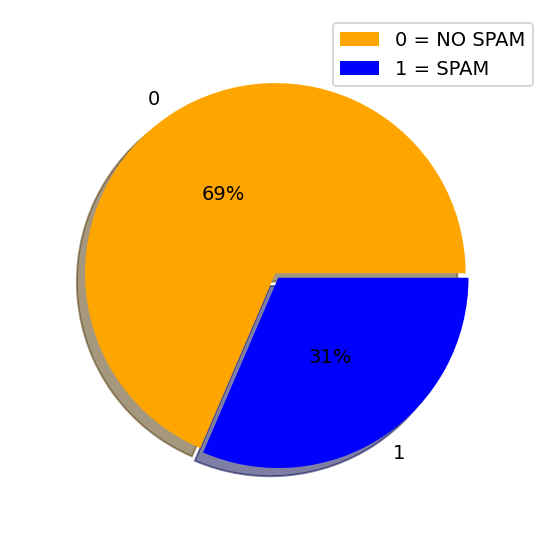

In [29]:
# Pie chart
pie_chart(ENRON, "spam", "Visuals/ENRON/PieChart.jpeg")

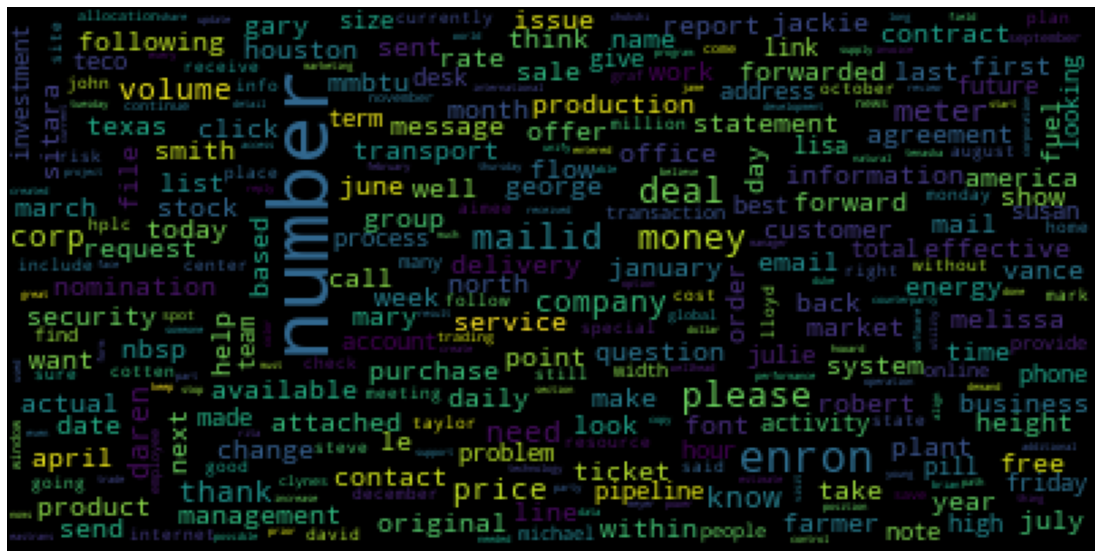

In [30]:
# Word CLoud 1 on the entire dataset
word_cloud(ENRON, "X", "Visuals/ENRON/word_cloud_overall.jpeg")

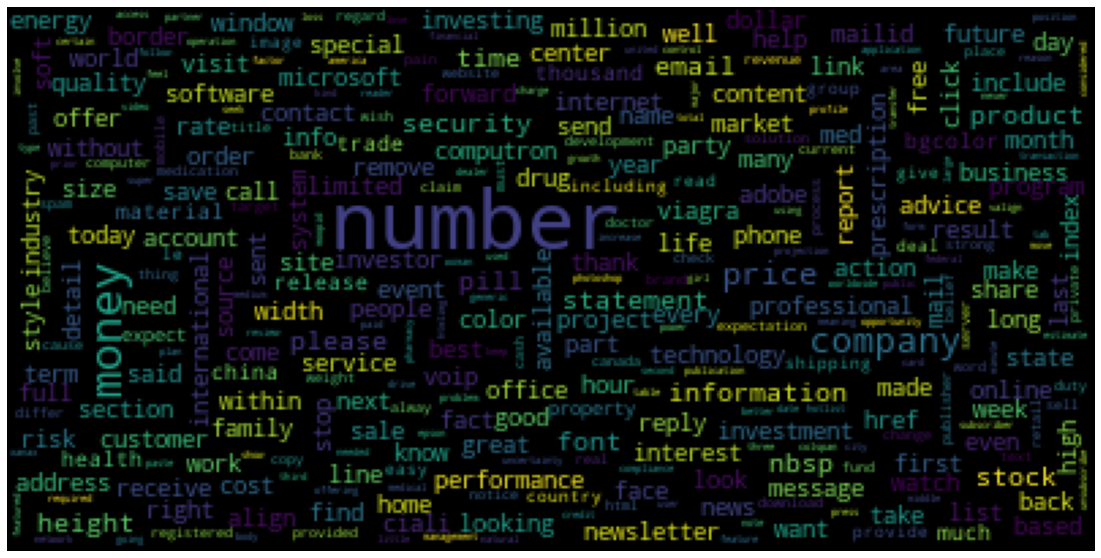

In [31]:
# Word CLoud 2 on Only Spam 
Only_Spam = ENRON.loc[ENRON["spam"] != 0]
word_cloud(Only_Spam, "X", "Visuals/ENRON/wordcloud_spam.jpeg")

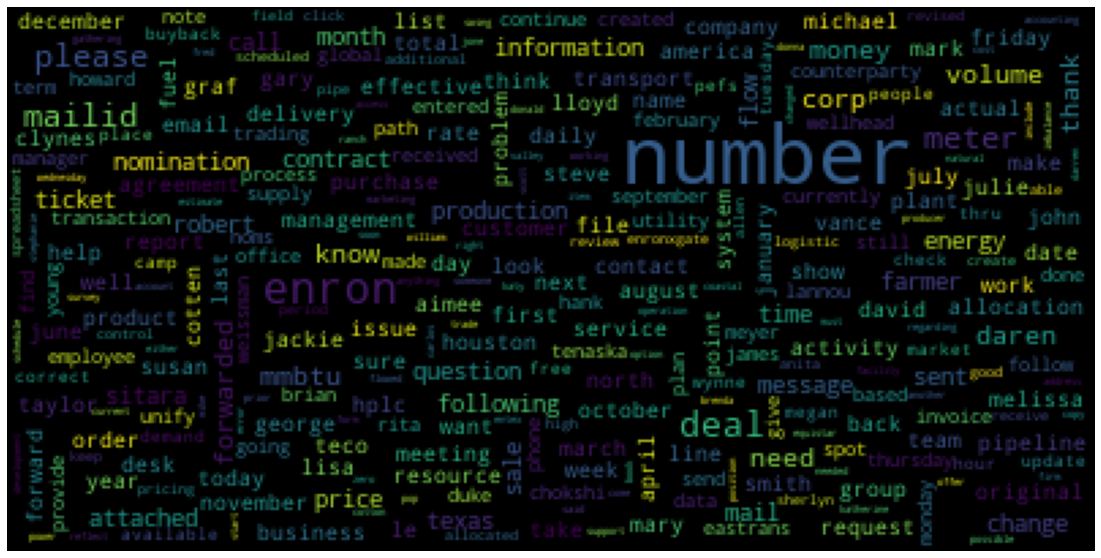

In [32]:
# Word CLoud 1 on Only Ham
Only_Ham =  ENRON.loc[ENRON["spam"] != 1]
word_cloud(Only_Ham, "X", "Visuals/ENRON/wordcloud_ham.jpeg")

# LING SPAM

## Step 1 : Cleaning

In [33]:
#lingspam
print(f"duplicated entries {LINGSPAM.duplicated().sum()}")
LINGSPAM = LINGSPAM.drop_duplicates()
print(f"duplicated entries {LINGSPAM.duplicated().sum()}")

duplicated entries 17
duplicated entries 0


In [34]:
LINGSPAM.head()

subject  \
0            job posting - apple-iss research center   
1                                                NaN   
2  query : letter frequencies for text identifica...   
3                                               risk   
4                           request book information   

                                             message  label  
0  content - length : 3386 apple-iss research cen...      0  
1  lang classification grimes , joseph e . and ba...      0  
2  i am posting this inquiry for sergei atamas ( ...      0  
3  a colleague and i are researching the differin...      0  
4  earlier this morning i was on the phone with a...      0

In [35]:
#remove Null values
print("Number of null values in LINGSPAM :")
print(f"{LINGSPAM.isnull().sum()}")
print(f"shape of the dataset : {LINGSPAM.shape}, Number of rows and columns : {LINGSPAM.shape[0]} , {LINGSPAM.shape[1]}")

print()
LINGSPAM.dropna(subset=["subject"], inplace=True)

print("Number of null features in LINGSPAM :")
print(f"{LINGSPAM.isnull().sum()}")
print(f"shape of the dataset : {LINGSPAM.shape}, Number of rows and columns : {LINGSPAM.shape[0]} , {LINGSPAM.shape[1]}")

Number of null values in LINGSPAM :
subject    62
message     0
label       0
dtype: int64
shape of the dataset : (2876, 3), Number of rows and columns : 2876 , 3

Number of null features in LINGSPAM :
subject    0
message    0
label      0
dtype: int64
shape of the dataset : (2814, 3), Number of rows and columns : 2814 , 3


## Step 2 : Feature Engineering

In [36]:
LINGSPAM.head()


subject  \
0            job posting - apple-iss research center   
2  query : letter frequencies for text identifica...   
3                                               risk   
4                           request book information   
5  call for abstracts : optimality in syntactic t...   

                                             message  label  
0  content - length : 3386 apple-iss research cen...      0  
2  i am posting this inquiry for sergei atamas ( ...      0  
3  a colleague and i are researching the differin...      0  
4  earlier this morning i was on the phone with a...      0  
5  content - length : 4437 call for papers is the...      0

In [37]:
LINGSPAM["subject_message"] = LINGSPAM.subject + LINGSPAM.message
LINGSPAM.head()

subject  \
0            job posting - apple-iss research center   
2  query : letter frequencies for text identifica...   
3                                               risk   
4                           request book information   
5  call for abstracts : optimality in syntactic t...   

                                             message  label  \
0  content - length : 3386 apple-iss research cen...      0   
2  i am posting this inquiry for sergei atamas ( ...      0   
3  a colleague and i are researching the differin...      0   
4  earlier this morning i was on the phone with a...      0   
5  content - length : 4437 call for papers is the...      0   

                                     subject_message  
0  job posting - apple-iss research centercontent...  
2  query : letter frequencies for text identifica...  
3  riska colleague and i are researching the diff...  
4  request book informationearlier this morning i...  
5  call for abstracts : optimality in syntactic t...

In [38]:
LINGSPAM["length"] = LINGSPAM.subject_message.apply(len)
LINGSPAM = LINGSPAM.drop(columns="subject")
LINGSPAM.head()

message  label  \
0  content - length : 3386 apple-iss research cen...      0   
2  i am posting this inquiry for sergei atamas ( ...      0   
3  a colleague and i are researching the differin...      0   
4  earlier this morning i was on the phone with a...      0   
5  content - length : 4437 call for papers is the...      0   

                                     subject_message  length  
0  job posting - apple-iss research centercontent...    2895  
2  query : letter frequencies for text identifica...    1485  
3  riska colleague and i are researching the diff...     328  
4  request book informationearlier this morning i...    1070  
5  call for abstracts : optimality in syntactic t...    4543

## Cleaning

In [39]:
LINGSPAM = LINGSPAM.reset_index(drop=True)
LINGSPAM.head()

message  label  \
0  content - length : 3386 apple-iss research cen...      0   
1  i am posting this inquiry for sergei atamas ( ...      0   
2  a colleague and i are researching the differin...      0   
3  earlier this morning i was on the phone with a...      0   
4  content - length : 4437 call for papers is the...      0   

                                     subject_message  length  
0  job posting - apple-iss research centercontent...    2895  
1  query : letter frequencies for text identifica...    1485  
2  riska colleague and i are researching the diff...     328  
3  request book informationearlier this morning i...    1070  
4  call for abstracts : optimality in syntactic t...    4543

In [40]:
def replace_hyperlink(word):
    return re.sub(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$', 'Links', word)

def replace_hyperlink_spaced(word):
    return re.sub(r'(http|https) \w+[ ]?\.[ ]?\w+', 'Links ', word)

def replace_email(word):
    return re.sub(r'^.+@[^\.].*\.[a-z]{2,}$', 'MailID', word)

def replace_email_spaced(word):
    return re.sub(r"[a-z0-9\.\-+_ ]+@[a-z0-9\.\-+_ ]+\.[a-z ]+", "MailID ", word)

def replace_money_sign(word):
    return re.sub(r"(£|\$)", "Money ", word)

def replace_numbers(word):
    return re.sub(r'\d+\.?[0-9]*', 'numbers ', word)

def replace_contact_numbers(word):
    return re.sub(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 'contact number', word)

def replace_next_line_chars(word):
    return re.sub(r'\n'," ", word)

def clean_up_pipeline(sentence):
    cleaning_utils = [replace_hyperlink,
                      replace_hyperlink_spaced,
                      replace_email,
                      replace_email_spaced,
                      replace_money_sign,  
                      replace_numbers,
                      replace_contact_numbers,
                      replace_next_line_chars]
    for o in cleaning_utils:
        sentence = o(sentence)
    return sentence

LINGSPAM["CLEANED"] = [clean_up_pipeline(o) for o in LINGSPAM["subject_message"]]

In [41]:
for i in range(10):
    print(LINGSPAM.CLEANED[i])
    print("-----------------------------")

job posting - apple-iss research centercontent - length : numbers  apple-iss research center a us Money  numbers  million joint venture between apple computer inc . and the institute of systems science of the national university of singapore , located in singapore , is looking for : a senior speech scientist - - - - - - - - - - - - - - - - - - - - - - - - - the successful candidate will have research expertise in computational linguistics , including natural language processing and * * english * * and * * chinese * * statistical language modeling . knowledge of state-of - the-art corpus-based n - gram language models , cache language models , and part-of - speech language models are required . a text - to - speech project leader - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - the successful candidate will have research expertise expertise in two or more of the following areas : computational linguistics , including natural language parsing , lexical database design , and 

In [42]:
LINGSPAM.CLEANED[1]

"query : letter frequencies for text identificationi am posting this inquiry for sergei atamas (MailID ) , a research associate at the university of maryland at baltimore . his field is molecular biology , and his work involves comparing dna strings using various algorithms . i do n't understand the details well enough to pass them along . at any rate , one such algorithm relies upon frequencies with which the letters g , a , t , and c occur in the dna strings . he would like to explore the analogous use of letter ( sound ) frequencies in natural language texts . hence this posting . specifically , sergei wonders if any linguist subscribers could help steer him to recent literature concerning text identification based on letter frequencies . any suggestions could be sent directly to him at the above address , or to me and i ' ll pass them along . he would also be interested in collaborative work if this research connects with the work of any linguists or text processing specialists . h

In [43]:
LINGSPAM.head()

message  label  \
0  content - length : 3386 apple-iss research cen...      0   
1  i am posting this inquiry for sergei atamas ( ...      0   
2  a colleague and i are researching the differin...      0   
3  earlier this morning i was on the phone with a...      0   
4  content - length : 4437 call for papers is the...      0   

                                     subject_message  length  \
0  job posting - apple-iss research centercontent...    2895   
1  query : letter frequencies for text identifica...    1485   
2  riska colleague and i are researching the diff...     328   
3  request book informationearlier this morning i...    1070   
4  call for abstracts : optimality in syntactic t...    4543   

                                             CLEANED  
0  job posting - apple-iss research centercontent...  
1  query : letter frequencies for text identifica...  
2  riska colleague and i are researching the diff...  
3  request book informationearlier this morning i...  
4  call for abstracts : optimality in syntactic t...

## Pre Processing

In [44]:
LINGSPAM["puntuation_removed"] = LINGSPAM["CLEANED"].apply(lambda x: remove_puntuation(x))
LINGSPAM["tokenized_lower"] = LINGSPAM["puntuation_removed"].apply(lambda x: text_lower_tokenized(x))
LINGSPAM["large_tokens"] = LINGSPAM["tokenized_lower"].apply(lambda x: remove_small_words(x))
LINGSPAM["without_stopwords"] = LINGSPAM["large_tokens"].apply(lambda x: remove_stopwords(x))
LINGSPAM["without_stopwords"] = LINGSPAM["without_stopwords"].apply(lambda x: remove_userdefined_words(x))
LINGSPAM["Lemmatized"] = LINGSPAM["without_stopwords"].apply(lambda x: Lemmatize(x))
LINGSPAM["X"] = LINGSPAM["Lemmatized"].apply(lambda x: get_sentence(x))

In [45]:
LINGSPAM = LINGSPAM.drop(columns=["puntuation_removed", "tokenized_lower", "large_tokens", "without_stopwords", "Lemmatized", "CLEANED", "message", "subject_message", "length"])

In [46]:
LINGSPAM.head()

label                                                  X
0      0  posting appleiss research centercontent length...
1      0  query letter frequency text identificationi po...
2      0  riska colleague researching differing degree r...
3      0  request book informationearlier morning phone ...
4      0  call abstract optimality syntactic theoryconte...

In [47]:
for i in range(10):
    print(LINGSPAM.X[i])
    print("\n\n")

posting appleiss research centercontent length number appleiss research center money number million joint venture apple computer institute system science national university singapore located singapore looking senior speech scientist successful candidate research expertise computational linguistics including natural language processing english chinese statistical language modeling knowledge stateof theart corpusbased gram language model cache language model partof speech language model required text speech project leader successful candidate research expertise expertise following area computational linguistics including natural language parsing lexical database design statistical language modeling text tokenization normalization prosodic analysis substantial knowledge phonology syntax semantics chinese required knowledge acoustic phonetics speech signal processing desirable candidate least number number year relevant work experience technical degree least number number year experienc s

In [48]:
LINGSPAM.X.describe()

count                                                  2814
unique                                                 2804
top       number number linguistics imperialismwith rega...
freq                                                      2
Name: X, dtype: object

In [49]:
#lingspam
print(f"duplicated entries {LINGSPAM.duplicated().sum()}")
LINGSPAM = LINGSPAM.drop_duplicates()
print(f"duplicated entries {LINGSPAM.duplicated().sum()}")

duplicated entries 10
duplicated entries 0


In [50]:
LINGSPAM.head()

label                                                  X
0      0  posting appleiss research centercontent length...
1      0  query letter frequency text identificationi po...
2      0  riska colleague researching differing degree r...
3      0  request book informationearlier morning phone ...
4      0  call abstract optimality syntactic theoryconte...

In [51]:
#remove Null values
print("Number of null values in LINGSPAM :")
print(f"{LINGSPAM.isnull().sum()}")
print(f"shape of the dataset : {LINGSPAM.shape}, Number of rows and columns : {LINGSPAM.shape[0]} , {LINGSPAM.shape[1]}")

# print()
# LINGSPAM.dropna(subset=["X"], inplace=True)

# print("Number of null features in LINGSPAM :")
# print(f"{LINGSPAM.isnull().sum()}")
# print(f"shape of the dataset : {LINGSPAM.shape}, Number of rows and columns : {LINGSPAM.shape[0]} , {LINGSPAM.shape[1]}")

Number of null values in LINGSPAM :
label    0
X        0
dtype: int64
shape of the dataset : (2804, 2), Number of rows and columns : 2804 , 2


In [52]:
LINGSPAM.to_csv("Datasets/lingspam/PROCESSED.csv", index=False)

## Visualtization

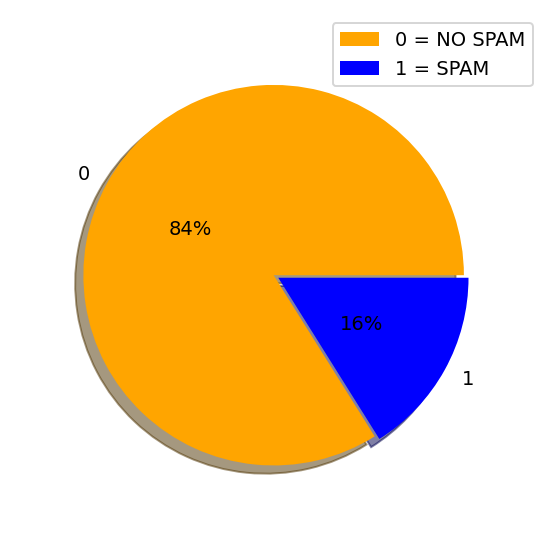

In [53]:
# Pie chart
pie_chart(LINGSPAM, "label", "Visuals/LINGSPAM/PieChart.jpeg")

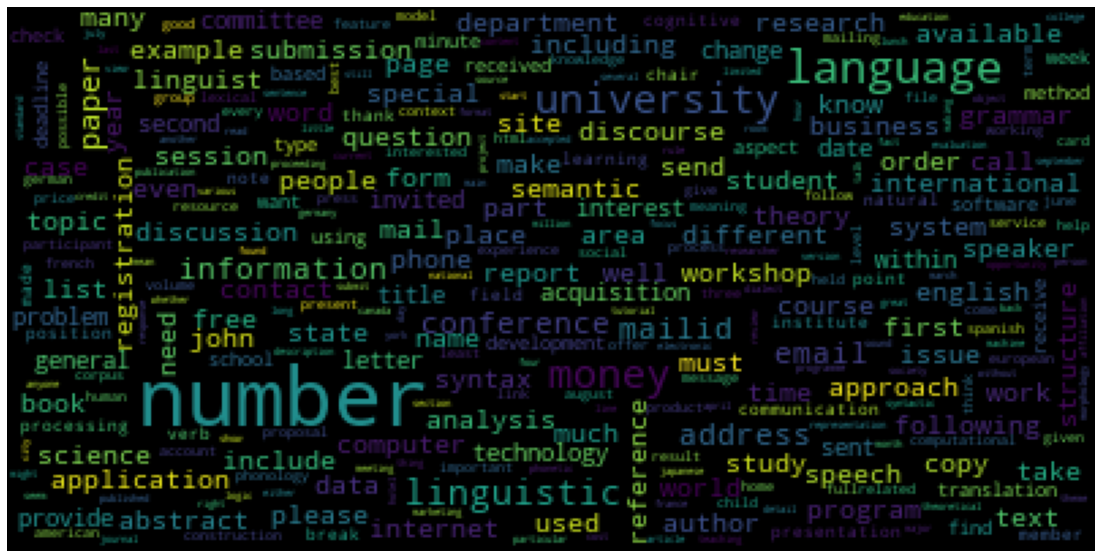

In [54]:
# Word CLoud 1 on the entire dataset
word_cloud(LINGSPAM, "X", "Visuals/LINGSPAM/word_cloud_overall.jpeg")

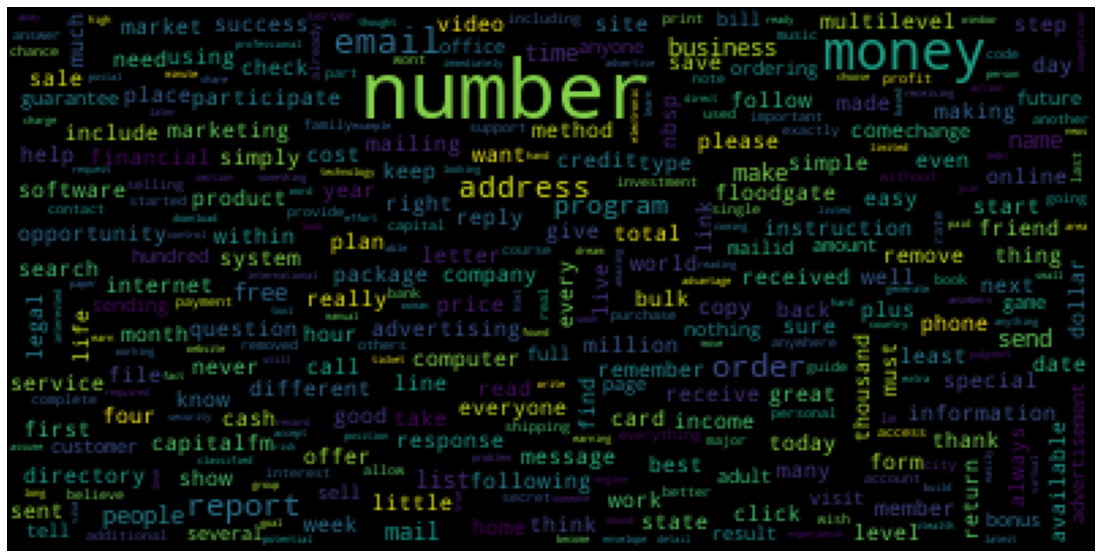

In [55]:
# Word CLoud 2 on Only Spam 
Only_Spam = LINGSPAM.loc[LINGSPAM["label"] != 0]
word_cloud(Only_Spam, "X", "Visuals/LINGSPAM/wordcloud_spam.jpeg")

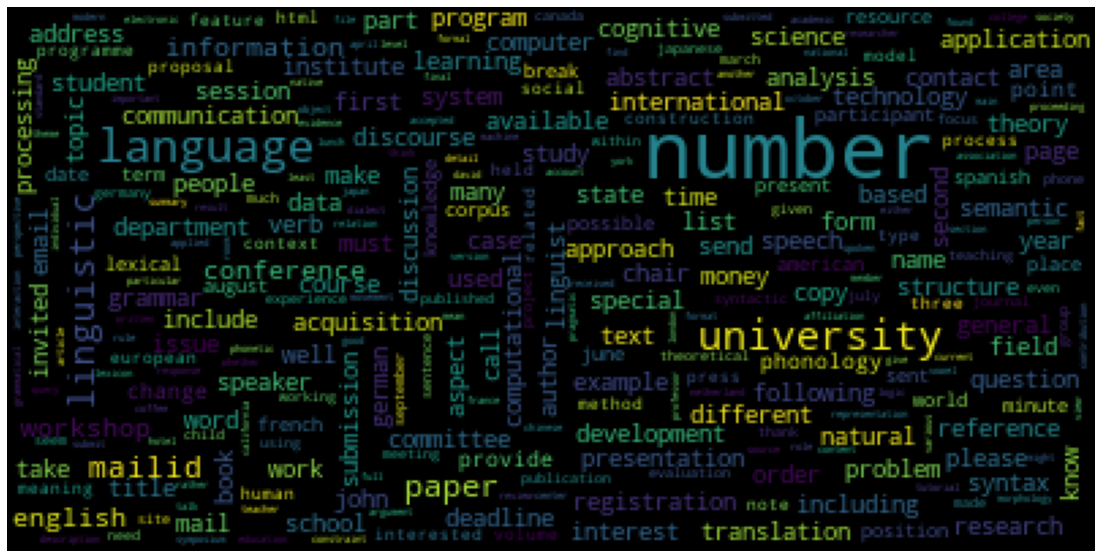

In [56]:
# Word CLoud 1 on Only Ham
Only_Ham =  LINGSPAM.loc[LINGSPAM["label"] != 1]
word_cloud(Only_Ham, "X", "Visuals/LINGSPAM/wordcloud_ham.jpeg")

# SPAM ASSASIN

In [57]:
spam_path = "Datasets/SpamAssasin/spam/"
spam2_path = "Datasets/SpamAssasin/spam_2/"
easy_ham_path = "Datasets/SpamAssasin/easy_ham_2/"
hard_ham_path = "Datasets/SpamAssasin/hard_ham/"

Email_files = {
    "spam_path" : os.listdir(spam_path),
    "spam2_path": os.listdir(spam2_path),
    "easy_ham_path": os.listdir(easy_ham_path),
    "hard_ham_path": os.listdir(hard_ham_path)
}

In [58]:
raw_data = []
processed_data = []
labels = []
invalid_list = []

In [59]:
def processemail(body):
    """
    Cleaning
    """
    body_pp = body.lower()
    body_pp = re.sub(r"<[^<>]+>", " html ", body_pp)
    body_pp = re.sub(r"[0-9]+", " number ", body_pp)
    body_pp = re.sub(r"(http|https)://[^\s]*", ' httpaddr ', body_pp)
    body_pp = re.sub(r"[^\s]+@[^\s]+", ' emailaddr ', body_pp)
    body_pp = re.sub(r"[$]+", ' dollar ', body_pp)
    body_pp = re.sub(r"[^a-zA-Z0-9]",' ', body_pp)
    return body_pp

def processfolder(path, label):
    for filename in os.listdir(path):
        if filename == "cmds":
            print(filename)
            continue
        try:
            file = open(path + filename,'r',errors='ignore')
            content = file.read()

            msg = email.message_from_string(content)
            if msg.is_multipart():
                body = []
                for payload in msg.get_payload():
                    # if payload.is_multipart(): ...
                    body.append(payload.get_payload())
                body = ' '.join(body)

            else:
                body = msg.get_payload()
            raw_data.append(body)
            body = processemail(body)
            processed_data.append(body)
            labels.append(label)
        except:
            invalid_list.append(filename)

In [60]:
processfolder(spam_path, 1)
processfolder(spam2_path, 1)
processfolder(easy_ham_path,0)
processfolder(hard_ham_path,0)
print("Total email count:{}".format(len(raw_data)))
print("Total labels: {}".format(len(labels)))

cmds
cmds
cmds
cmds
Total email count:4246
Total labels: 4246


In [61]:
SPAMASSASIN = pd.DataFrame(
    {'X': processed_data,
     "raw": raw_data,
     'label': labels,
     
    })
SPAMASSASIN.head()

X  \
0  as seen on nbc  cbs  cnn  and even oprah  the ...   
1   html   html  html  html em number  html   htm...   
2   number   fight the risk of cancer   httpaddr ...   
3        looking for property in spain   don t wa...   
4  removal instructions below   i saw your listin...   

                                                 raw  label  
0  As seen on NBC, CBS, CNN, and even Oprah! The ...      1  
1  <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Tr...      1  
2  1) Fight The Risk of Cancer!\nhttp://www.adcli...      1  
3  \n    \nLooking for Property in Spain?\n\nDon_...      1  
4  Removal instructions below\n\n\nI saw your lis...      1

In [62]:
for i in range(10):
    print(SPAMASSASIN.raw[i])
    print("---------------------------------------------")

As seen on NBC, CBS, CNN, and even Oprah! The health 
discovery that actually reverses aging while burning fat, 
without dieting or exercise! This proven discovery has even 
been reported on by the New England Journal of Medicine. 
Forget  aging and dieting forever! And it's Guaranteed!   

Click here:
http://web.kuhleersparnis.ch/hgh/index.html 

Would you like to lose weight while you sleep!
No dieting!
No hunger pains!
No Cravings!
No strenuous exercise!
Change your life forever! 

100% GUARANTEED!

1.Body Fat Loss            82% improvement.
2.Wrinkle Reduction     61% improvement.
3.Energy Level              84% improvement.
4.Muscle Strength         88% improvement.
5.Sexual Potency         75% improvement.
6.Emotional Stability      67% improvement.
7.Memory                      62% improvement.

***********************************************************

You are receiving this email as a subscriber
to the Opt-In America Mailing List. 
To unsubscribe from future offers,
just cl

In [63]:
for i in range(10):
    print(SPAMASSASIN.X[i])
    print("---------------------------------------------")

as seen on nbc  cbs  cnn  and even oprah  the health  discovery that actually reverses aging while burning fat   without dieting or exercise  this proven discovery has even  been reported on by the new england journal of medicine   forget  aging and dieting forever  and it s guaranteed      click here   httpaddr    would you like to lose weight while you sleep  no dieting  no hunger pains  no cravings  no strenuous exercise  change your life forever     number   guaranteed    number  body fat loss             number   improvement   number  wrinkle reduction      number   improvement   number  energy level               number   improvement   number  muscle strength          number   improvement   number  sexual potency          number   improvement   number  emotional stability       number   improvement   number  memory                       number   improvement                                                                you are receiving this email as a subscriber to the opt in am

## Cleaning

In [64]:
#lingspam
print(f"duplicated entries {SPAMASSASIN.duplicated().sum()}")
SPAMASSASIN = SPAMASSASIN.drop_duplicates()
print(f"duplicated entries {SPAMASSASIN.duplicated().sum()}")

duplicated entries 741
duplicated entries 0


In [65]:
SPAMASSASIN.head()

X  \
0  as seen on nbc  cbs  cnn  and even oprah  the ...   
1   html   html  html  html em number  html   htm...   
2   number   fight the risk of cancer   httpaddr ...   
3        looking for property in spain   don t wa...   
4  removal instructions below   i saw your listin...   

                                                 raw  label  
0  As seen on NBC, CBS, CNN, and even Oprah! The ...      1  
1  <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Tr...      1  
2  1) Fight The Risk of Cancer!\nhttp://www.adcli...      1  
3  \n    \nLooking for Property in Spain?\n\nDon_...      1  
4  Removal instructions below\n\n\nI saw your lis...      1

In [66]:
#remove Null values
print("Number of null values in SPAMASSASIN :")
print(f"{SPAMASSASIN.isnull().sum()}")
print(f"shape of the dataset : {SPAMASSASIN.shape}, Number of rows and columns : {SPAMASSASIN.shape[0]} , {SPAMASSASIN.shape[1]}")

print()
SPAMASSASIN.dropna(subset=["X"], inplace=True)

print("Number of null features in SPAMASSASIN :")
print(f"{SPAMASSASIN.isnull().sum()}")
print(f"shape of the dataset : {SPAMASSASIN.shape}, Number of rows and columns : {SPAMASSASIN.shape[0]} , {SPAMASSASIN.shape[1]}")

Number of null values in SPAMASSASIN :
X        0
raw      0
label    0
dtype: int64
shape of the dataset : (3505, 3), Number of rows and columns : 3505 , 3

Number of null features in SPAMASSASIN :
X        0
raw      0
label    0
dtype: int64
shape of the dataset : (3505, 3), Number of rows and columns : 3505 , 3


## Step 2 : Feature Engineering

In [67]:
SPAMASSASIN["puntuation_removed"] = SPAMASSASIN["X"].apply(lambda x: remove_puntuation(x))
SPAMASSASIN["tokenized_lower"] = SPAMASSASIN["puntuation_removed"].apply(lambda x: text_lower_tokenized(x))
SPAMASSASIN["large_tokens"] = SPAMASSASIN["tokenized_lower"].apply(lambda x: remove_small_words(x))
SPAMASSASIN["without_stopwords"] = SPAMASSASIN["large_tokens"].apply(lambda x: remove_stopwords(x))
SPAMASSASIN["without_stopwords"] = SPAMASSASIN["without_stopwords"].apply(lambda x: remove_userdefined_words(x))
SPAMASSASIN["Lemmatized"] = SPAMASSASIN["without_stopwords"].apply(lambda x: Lemmatize(x))
SPAMASSASIN["X"] = SPAMASSASIN["Lemmatized"].apply(lambda x: get_sentence(x))

In [68]:
SPAMASSASIN = SPAMASSASIN.drop(columns=["puntuation_removed", "tokenized_lower", "large_tokens", "without_stopwords", "Lemmatized", "raw"])

In [69]:
SPAMASSASIN.head()

X  label
0  seen even oprah health discovery actually reve...      1
1  html html html html number html html html html...      1
2  number fight risk cancer httpaddr number numbe...      1
3  looking property spain waste time people look ...      1
4  removal instruction listing internet work comp...      1

In [70]:
for i in range(10):
    print(SPAMASSASIN.X[i])
    print("\n\n")

seen even oprah health discovery actually revers aging burning without dieting exercise proven discovery even reported england journal medicine forget aging dieting forever guaranteed click httpaddr would like lose weight sleep dieting hunger pain craving strenuous exercise change life forever number guaranteed number body loss number improvement number wrinkle reduction number improvement number energy level number improvement number muscle strength number improvement number sexual potency number improvement number emotional stability number improvement number memory number improvement receiving email subscriber america mailing list unsubscribe future offer click emailaddr



html html html html number html html html html html html html html html html html html html html html html html html html html html html html html html html html html html html html html html html html html html html html html html html html html html html html html html html html html html html html html html ht

In [71]:
SPAMASSASIN.X.describe()

count                                                  3505
unique                                                 3204
top       mail error subscribed html version daily dilbe...
freq                                                      7
Name: X, dtype: object

In [72]:
#lingspam
print(f"duplicated entries {SPAMASSASIN.duplicated().sum()}")
SPAMASSASIN = SPAMASSASIN.drop_duplicates()
print(f"duplicated entries {SPAMASSASIN.duplicated().sum()}")

duplicated entries 301
duplicated entries 0


In [73]:
SPAMASSASIN.head()

X  label
0  seen even oprah health discovery actually reve...      1
1  html html html html number html html html html...      1
2  number fight risk cancer httpaddr number numbe...      1
3  looking property spain waste time people look ...      1
4  removal instruction listing internet work comp...      1

In [74]:
#remove Null values
print("Number of null values in LINGSPAM :")
print(f"{SPAMASSASIN.isnull().sum()}")
print(f"shape of the dataset : {SPAMASSASIN.shape}, Number of rows and columns : {SPAMASSASIN.shape[0]} , {SPAMASSASIN.shape[1]}")

# print()
# LINGSPAM.dropna(subset=["X"], inplace=True)

# print("Number of null features in LINGSPAM :")
# print(f"{LINGSPAM.isnull().sum()}")
# print(f"shape of the dataset : {LINGSPAM.shape}, Number of rows and columns : {LINGSPAM.shape[0]} , {LINGSPAM.shape[1]}")

Number of null values in LINGSPAM :
X        0
label    0
dtype: int64
shape of the dataset : (3204, 2), Number of rows and columns : 3204 , 2


In [75]:
SPAMASSASIN.to_csv("Datasets/SpamAssasin/Processed/PROCESSED.csv", index=False)

## Visualtization

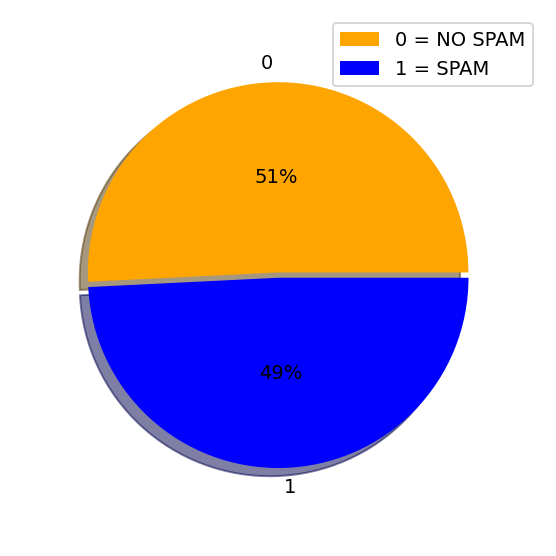

In [76]:
# Pie chart
pie_chart(SPAMASSASIN, "label", "Visuals/SPAMASSASIN/PieChart.jpeg")

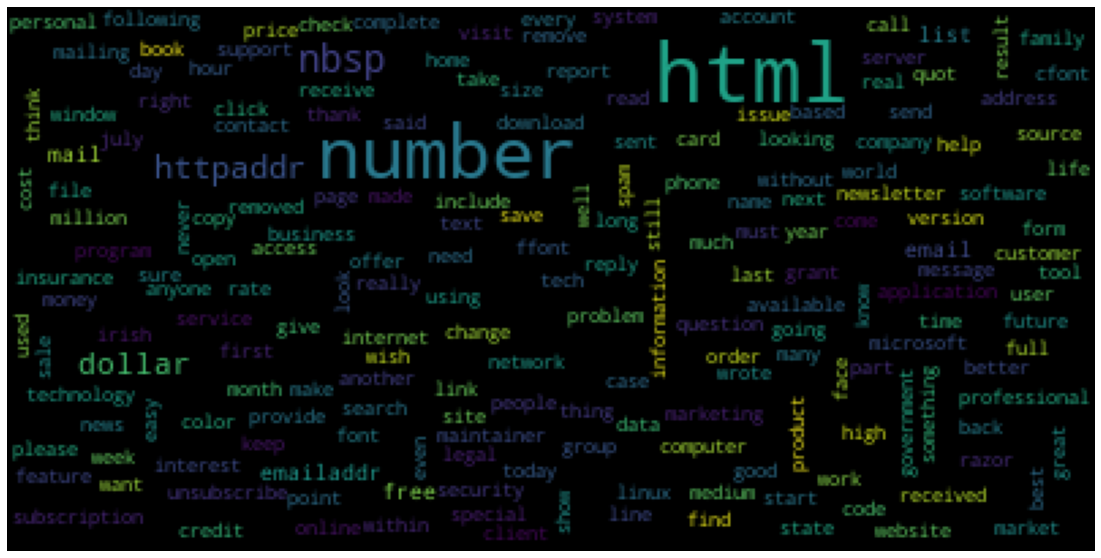

In [77]:
# Word CLoud 1 on the entire dataset
word_cloud(SPAMASSASIN, "X", "Visuals/SPAMASSASIN/word_cloud_overall.jpeg")

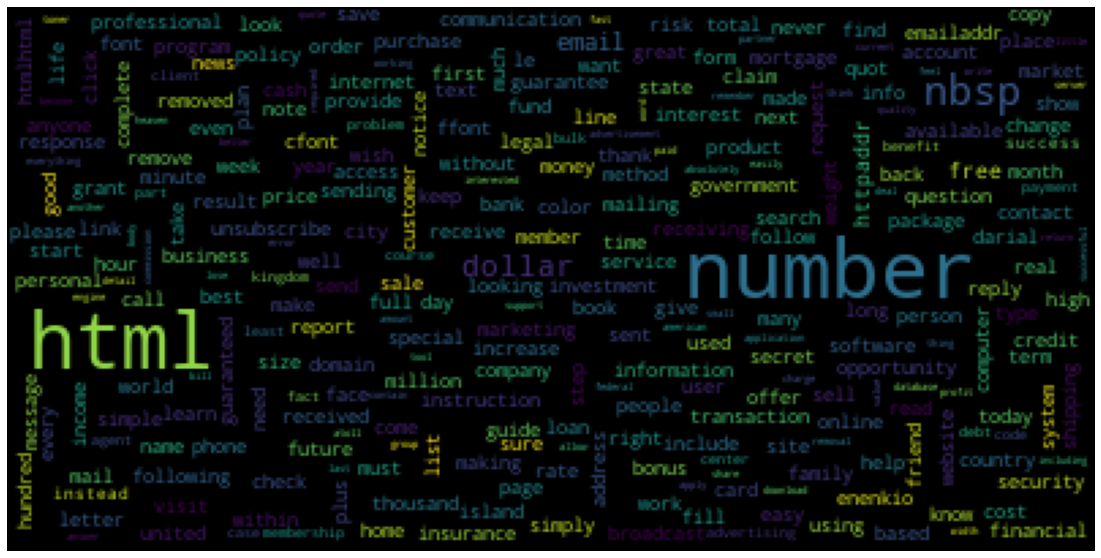

In [78]:
# Word CLoud 2 on Only Spam 
Only_Spam = SPAMASSASIN.loc[SPAMASSASIN["label"] != 0]
word_cloud(Only_Spam, "X", "Visuals/SPAMASSASIN/wordcloud_spam.jpeg")

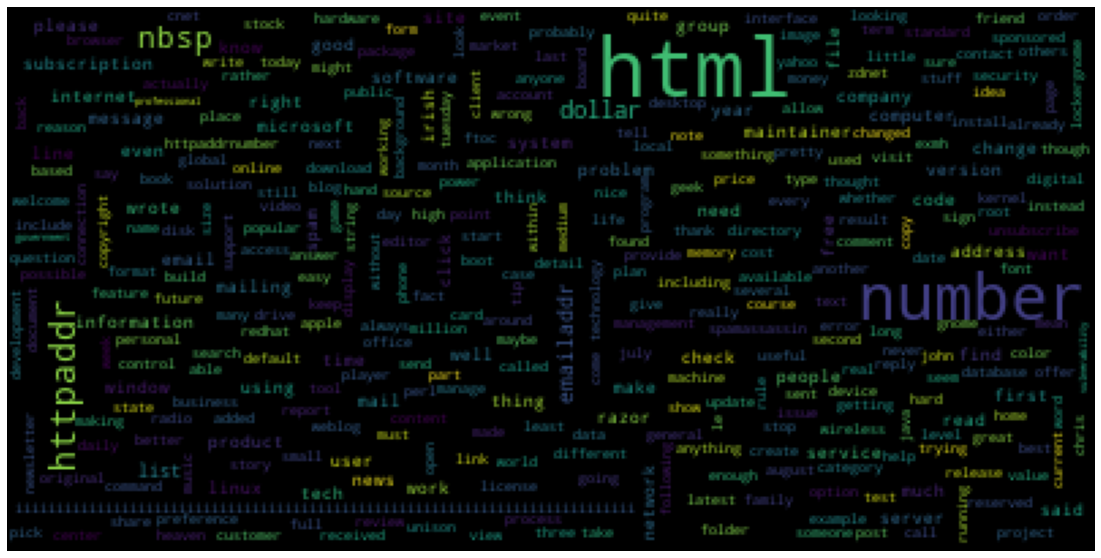

In [79]:
# Word CLoud 1 on Only Ham
Only_Ham =  SPAMASSASIN.loc[SPAMASSASIN["label"] != 1]
word_cloud(Only_Ham, "X", "Visuals/SPAMASSASIN/wordcloud_ham.jpeg")

# Spam Base data prep

In [81]:
SPAMBASE.head()

0  0.64  0.64.1  0.1  0.32   0.2   0.3   0.4   0.5   0.6  ...  0.40  \
0  0.21  0.28    0.50  0.0  0.14  0.28  0.21  0.07  0.00  0.94  ...  0.00   
1  0.06  0.00    0.71  0.0  1.23  0.19  0.19  0.12  0.64  0.25  ...  0.01   
2  0.00  0.00    0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.00   
3  0.00  0.00    0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.00   
4  0.00  0.00    0.00  0.0  1.85  0.00  0.00  1.85  0.00  0.00  ...  0.00   

    0.41  0.42  0.778   0.43   0.44  3.756   61   278  1  
0  0.132   0.0  0.372  0.180  0.048  5.114  101  1028  1  
1  0.143   0.0  0.276  0.184  0.010  9.821  485  2259  1  
2  0.137   0.0  0.137  0.000  0.000  3.537   40   191  1  
3  0.135   0.0  0.135  0.000  0.000  3.537   40   191  1  
4  0.223   0.0  0.000  0.000  0.000  3.000   15    54  1  

[5 rows x 58 columns]

In [82]:
SPAMBASE_DOCUMENTATION

['1. Title:  SPAM E-mail Database\n',
 '\n',
 '2. Sources:\n',
 '   (a) Creators: Mark Hopkins, Erik Reeber, George Forman, Jaap Suermondt\n',
 '        Hewlett-Packard Labs, 1501 Page Mill Rd., Palo Alto, CA 94304\n',
 '   (b) Donor: George Forman (gforman at nospam hpl.hp.com)  650-857-7835\n',
 '   (c) Generated: June-July 1999\n',
 '\n',
 '3. Past Usage:\n',
 '   (a) Hewlett-Packard Internal-only Technical Report. External forthcoming.\n',
 '   (b) Determine whether a given email is spam or not.\n',
 '   (c) ~7% misclassification error.\n',
 '       False positives (marking good mail as spam) are very undesirable.\n',
 '       If we insist on zero false positives in the training/testing set,\n',
 '       20-25% of the spam passed through the filter.\n',
 '\n',
 '4. Relevant Information:\n',
 '        The "spam" concept is diverse: advertisements for products/web\n',
 '        sites, make money fast schemes, chain letters, pornography...\n',
 '\tOur collection of spam e-mails came f

In [105]:
col_names = [
    "word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", "word_freq_our",          
    "word_freq_over", "word_freq_remove", "word_freq_internet", "word_freq_order", "word_freq_mail",
    "word_freq_receive","word_freq_will","word_freq_people","word_freq_report","word_freq_addresses",
    "word_freq_free","word_freq_business","word_freq_email","word_freq_you","word_freq_credit",
    "word_freq_your","word_freq_font","word_freq_000","word_freq_money","word_freq_hp","word_freq_hpl",
    "word_freq_george","word_freq_650","word_freq_lab","word_freq_labs","word_freq_telnet","word_freq_857",
    "word_freq_data","word_freq_415","word_freq_85","word_freq_technology","word_freq_1999","word_freq_parts",
    "word_freq_pm","word_freq_direct","word_freq_cs","word_freq_meeting","word_freq_original",
    "word_freq_project","word_freq_re","word_freq_edu","word_freq_table","word_freq_conference",
    "char_freq_;","char_freq_(","char_freq_[","char_freq_!","char_freq_$","char_freq_#",
    "capital_run_length_average","capital_run_length_longest","capital_run_length_total","label" ]

In [104]:
len(col_names)

57

In [106]:
SPAMBASE.columns = col_names

In [107]:
SPAMBASE.head()

word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.21               0.28           0.50           0.0   
1            0.06               0.00           0.71           0.0   
2            0.00               0.00           0.00           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.14            0.28              0.21                0.07   
1           1.23            0.19              0.19                0.12   
2           0.63            0.00              0.31                0.63   
3           0.63            0.00              0.31                0.63   
4           1.85            0.00              0.00                1.85   

   word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0             0.00            0.94  ...         0.00        0.132   
1             0.64            0.25  ...         0.01        0.143   
2             0.31            0.63  ...         0.00        0.137   
3             0.31            0.63  ...         0.00        0.135   
4             0.00            0.00  ...         0.00        0.223   

   char_freq_[  char_freq_!  char_freq_$  char_freq_#  \
0          0.0        0.372        0.180        0.048   
1          0.0        0.276        0.184        0.010   
2          0.0        0.137        0.000        0.000   
3          0.0        0.135        0.000        0.000   
4          0.0        0.000        0.000        0.000   

   capital_run_length_average  capital_run_length_longest  \
0                       5.114                         101   
1                       9.821                         485   
2                       3.537                          40   
3                       3.537                          40   
4                       3.000                          15   

   capital_run_length_total  label  
0                      1028      1  
1                      2259      1  
2                       191      1  
3                       191      1  
4                        54      1  

[5 rows x 58 columns]

In [115]:
SPAMBASE.dtypes

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

In [116]:
SPAMBASE.to_csv("Datasets/spambase/PROCESSED.csv", index=False)